##### Dataset

In [2]:
# wine-class.csv
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the data

In [7]:
df = pd.read_csv('datasets/wine-class.csv')

In [8]:
df

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


##### Separate the input and output variables

In [10]:
x = df.drop('class', axis = 1)
y = df['class']

In [11]:
x.shape

(178, 13)

In [12]:
x.columns

Index(['alcohol', ' malic_acid', ' ash', ' alcalinity_of_ash', ' magnesium',
       ' total_phenols', ' flavanoids', ' nonflavanoid_phenols',
       ' proanthocyanins', ' color_intensity', ' hue',
       ' od280/od315_of_diluted_wines', ' proline'],
      dtype='object')

In [13]:
y.value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

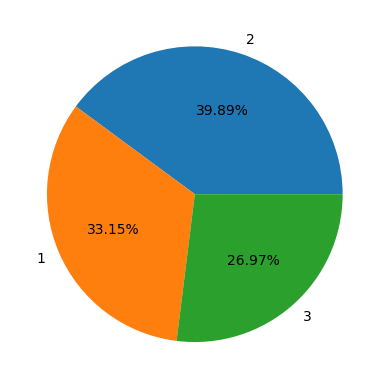

In [15]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

##### Feature Selection

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

In [18]:
skf = SelectKBest(score_func=chi2, k=5)

In [20]:
skf.fit(x, y)

SelectKBest(k=5, score_func=<function chi2 at 0x7bf80bab79a0>)

In [21]:
skf.get_support()

array([False, False, False,  True,  True, False,  True, False, False,
        True, False, False,  True])

In [22]:
x_new = x.iloc[:,skf.get_support()]
x_new

,alcalinity_of_ash,magnesium,flavanoids,color_intensity,proline
0,15.6,127,3.06,5.64,1065
1,11.2,100,2.76,4.38,1050
2,18.6,101,3.24,5.68,1185
3,16.8,113,3.49,7.80,1480
4,21.0,118,2.69,4.32,735
...,...,...,...,...,...
173,20.5,95,0.61,7.70,740
174,23.0,102,0.75,7.30,750
175,20.0,120,0.69,10.20,835
176,20.0,120,0.68,9.30,840


In [26]:
df_new = x_new.copy()
df_new['class'] = y

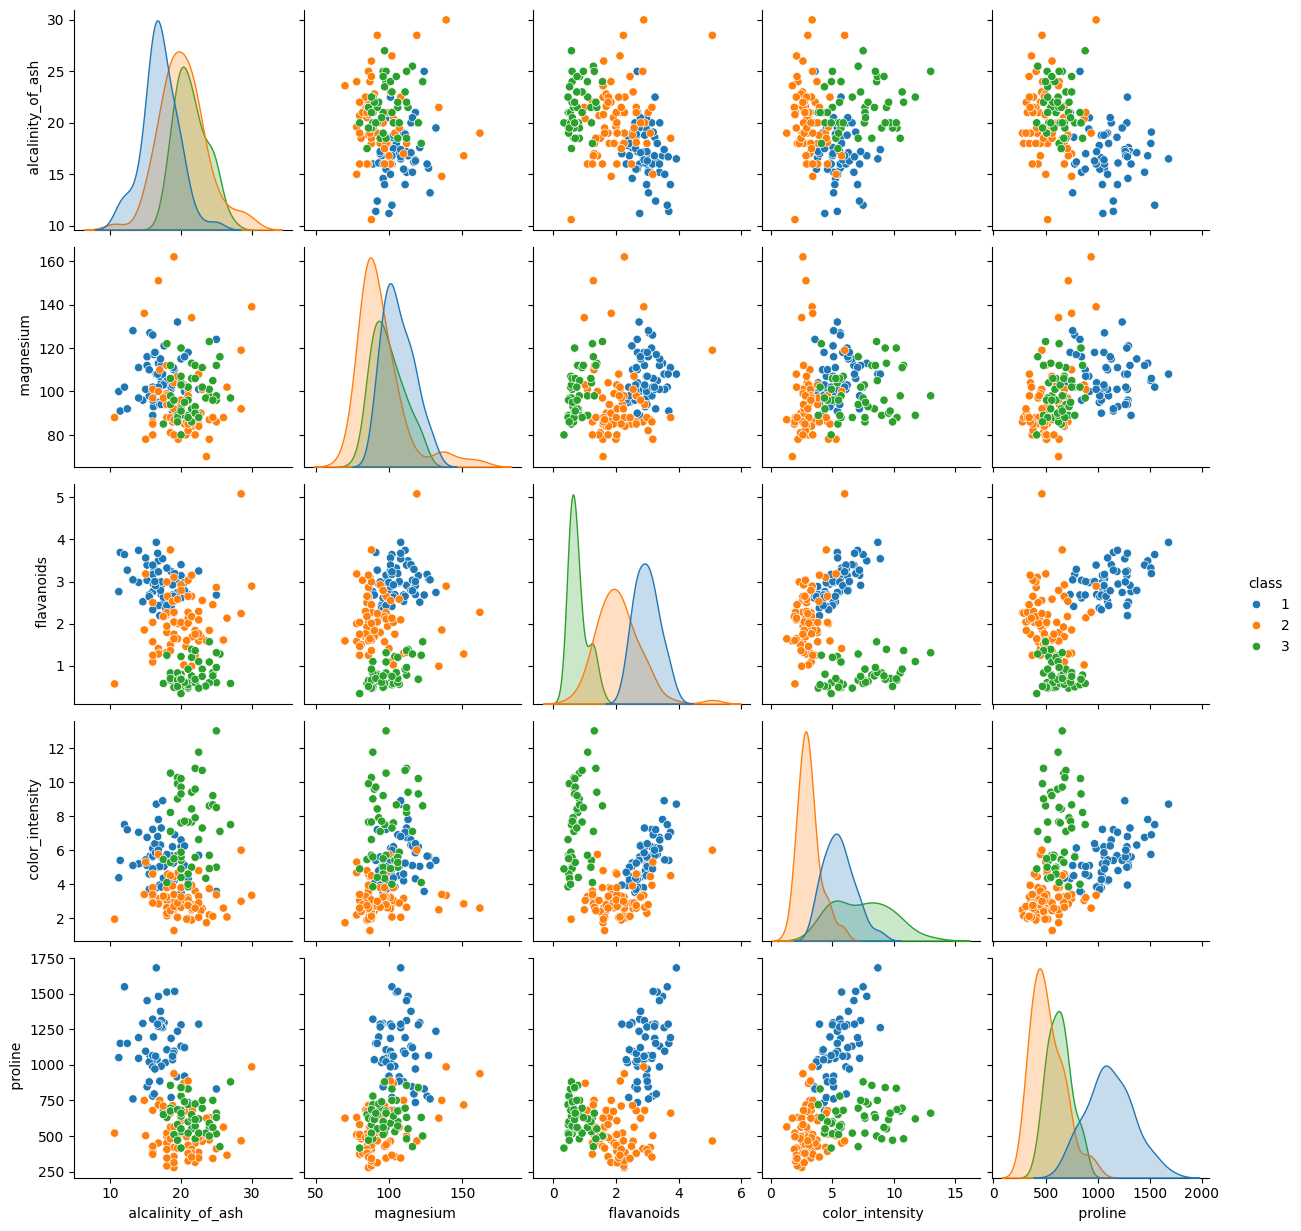

In [28]:
sns.pairplot(df_new, hue='class', palette='tab10')

##### Cross-Validation

In [29]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(
    x_new, y, random_state=0, stratify=y)

In [48]:
x_train.shape

(133, 5)

In [49]:
x_test.shape

(45, 5)

##### Build the model

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
clf_nb = GaussianNB()

In [52]:
clf_nb.fit(x_train, y_train)

GaussianNB()

##### Performance Evaluation

In [53]:
y_pred = clf_nb.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [55]:
print(confusion_matrix(y_test, y_pred))

[[14  1  0]
 [ 0 17  1]
 [ 0  0 12]]


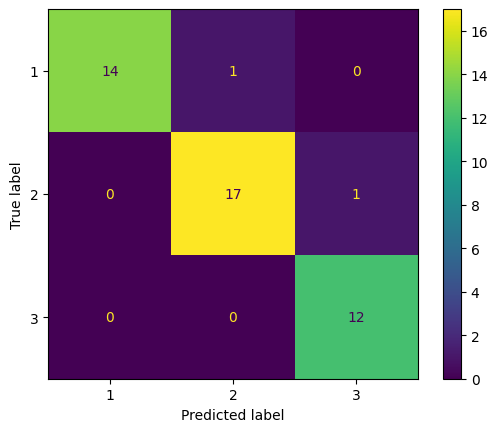

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [57]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.94      0.94      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [59]:
clf_nb.predict_proba(x_test)

array([[1.43171363e-10, 4.43828312e-09, 9.99999995e-01],
       [3.91985007e-01, 6.08014993e-01, 2.00654707e-10],
       [2.25747320e-07, 9.99992548e-01, 7.22577125e-06],
       [5.60632135e-01, 4.39367817e-01, 4.84250931e-08],
       [4.49119443e-12, 1.02481483e-04, 9.99897519e-01],
       [2.58338199e-12, 2.29421712e-12, 1.00000000e+00],
       [4.00334316e-11, 7.09111341e-16, 1.00000000e+00],
       [3.66682062e-06, 7.32623817e-02, 9.26733952e-01],
       [9.99999949e-01, 5.07672203e-08, 5.26015304e-19],
       [2.17210274e-06, 9.98178172e-02, 9.00180011e-01],
       [9.98354179e-01, 1.64582123e-03, 1.84658853e-17],
       [1.00000000e+00, 9.54833106e-16, 3.55255170e-35],
       [9.87839089e-05, 9.99901206e-01, 1.00769680e-08],
       [4.99197228e-05, 5.49403458e-06, 9.99944586e-01],
       [9.93181503e-01, 6.81849720e-03, 2.48877739e-13],
       [1.00000000e+00, 3.34856326e-11, 1.00147218e-23],
       [9.99997222e-01, 2.77770265e-06, 3.31122403e-21],
       [2.66611912e-07, 9.79356